In [1]:
import numpy as np
from scipy.integrate import romberg
import matplotlib.pyplot as plt

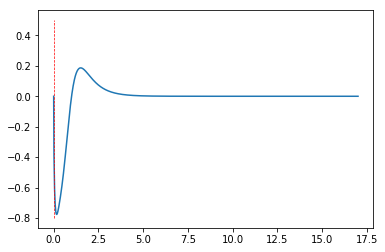

In [39]:
def funkcja(x):
    return np.sin(np.pi*((1 + np.sqrt(x)) / (1 + x**2)))*np.exp(-x)

# poglądowy wykres funkcji podcałkowej    
samples = np.linspace(0, 17, 1000)
plt.plot(samples, funkcja(samples))

# czerwona linia - zaznacza początek całkowania
zero_samples = np.linspace(-0.8, 0.5, 100)
zero_values = np.linspace(0,0,100)
plt.plot(zero_values, zero_samples, "r--", linewidth=0.7)
plt.show()

In [38]:
"""
Mamy całkę po przedziale nieskończonym. Zgodnie ze wskazówką w zadaniu rozbijam ją na dwie całki w granicach [0,A] i [A, +nieskończoność]
Całka w pierwszym przedziale jest całką po przedziale zamkniętym i możemy ją policzyć metodą Romberga.


Szukamy takiego ogona [A, +nieskończoność] który na pewno będzie zmierzał do 0
Tą całkę szacujemy analitycznie

Możemu zauważyć że funkcja podcałkowa jest niewiększa nod exp(-x) : sin porusza się tylko od [-1,1], a exp(-x) dąży do zera 
i szybko "tłumi" całą funkcję
Jednocześnie: 
                całka z exp(-x) w granicach [17, + nieskończoność] wynosi exp(-17) czyli ok. 0.414*10**(-7)
                
Dlatego musimy policzyć całkę z naszej funkcji po przedziale [0,17] z dokładnością nie mniejsza niż 0.586*10**(-7)
"""

romberg_integration = romberg(funkcja, 0, 17, tol=0.586e-07, show=True)
# tol to zadana toleracja

Romberg integration of <function vectorize1.<locals>.vfunc at 0x0000012F329771E0> from [0, 17]

 Steps  StepSize   Results
     1 17.000000  0.000000 
     2  8.500000  0.000289  0.000385 
     4  4.250000  0.029452  0.039173  0.041759 
     8  2.125000  0.265781  0.344557  0.364916  0.370045 
    16  1.062500  0.218808  0.203151  0.193724  0.191007  0.190305 
    32  0.531250 -0.028494 -0.110928 -0.131867 -0.137035 -0.138321 -0.138643 
    64  0.265625 -0.137075 -0.173269 -0.177425 -0.178148 -0.178309 -0.178349 -0.178358 
   128  0.132812 -0.187127 -0.203811 -0.205847 -0.206298 -0.206409 -0.206436 -0.206443 -0.206445 
   256  0.066406 -0.206347 -0.212754 -0.213350 -0.213469 -0.213497 -0.213504 -0.213506 -0.213506 -0.213506 
   512  0.033203 -0.213367 -0.215707 -0.215904 -0.215944 -0.215954 -0.215956 -0.215957 -0.215957 -0.215957 -0.215957 
  1024  0.016602 -0.215886 -0.216725 -0.216793 -0.216807 -0.216811 -0.216811 -0.216812 -0.216812 -0.216812 -0.216812 -0.216812 

The final result i